In [1426]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib as mpl
from scipy.optimize import minimize
from sklearn.linear_model import LogisticRegression

In [1427]:
%matplotlib notebook

In [1428]:
font = {'weight' : 'normal',
        'size'   : 15}
mpl.rcParams['figure.figsize'] = (6., 6.0)
mpl.rc('font', **font)
mpl.rcParams['axes.unicode_minus']=False
mpl.rc('axes', linewidth = 1.5)
mpl.rc('xtick', labelsize=15)
mpl.rc('ytick', labelsize=15)
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['axes.labelsize'] = 'large'
mpl.rcParams['xtick.major.size'] = 5.5     # major tick size in points
mpl.rcParams['xtick.major.width'] = 1.5     # major tick size in points
mpl.rcParams['ytick.major.size'] = 5.5     # major tick size in points
mpl.rcParams['ytick.major.width'] = 1.5     # major tick size in points

# Problem definition

Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.
Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams

In [1429]:
!head ex2data1.txt # training dataset

34.62365962451697,78.0246928153624,0
30.28671076822607,43.89499752400101,0
35.84740876993872,72.90219802708364,0
60.18259938620976,86.30855209546826,1
79.0327360507101,75.3443764369103,1
45.08327747668339,56.3163717815305,0
61.10666453684766,96.51142588489624,1
75.02474556738889,46.55401354116538,1
76.09878670226257,87.42056971926803,1
84.43281996120035,43.53339331072109,1


In [1430]:
df1 = pd.read_csv('ex2data1.txt',header=None)
df1.columns = ['grade1','grade2','pass']

<IPython.core.display.Javascript object>


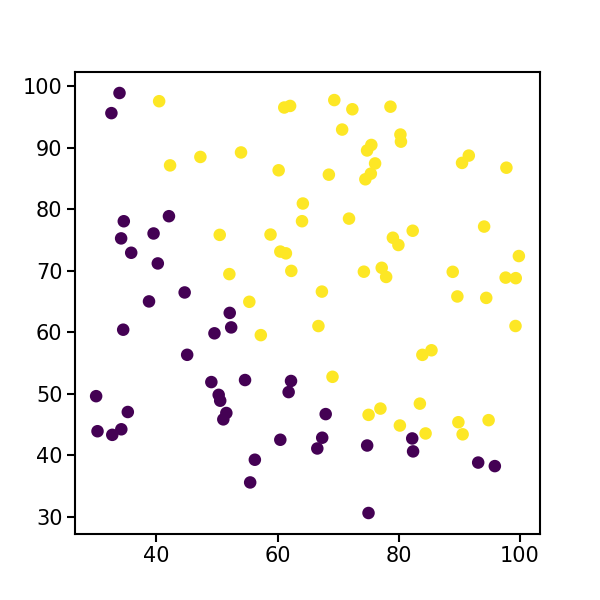

In [1431]:
fig = plt.figure()
ax = fig.add_subplot()
# ax.scatter( df1[:][0],df1[:][1], df1[:][2],lw=3,color='r')
ax.scatter( df1['grade1'],df1['grade2'], c=df1['pass'],lw=3)


In [1435]:
# defining regressor
def regressor(theta,X):
    '''
    inputs
    theta: coefficients (nx1 array)
    x: features dataset (mxn array) with m example and n features
    '''
    theta = theta.reshape((len(theta),1))
    return np.dot(X,theta)
    
# implementing sigmoid function for logistic classification
def sigm(theta,X):
    '''
    inputs
    theta: coefficients (nx1 array)
    x: features dataset (mxn array) with m example and n features
    '''
    y = regressor(theta,X)
    return 1/(1 + np.exp(-y))



In [1436]:
# implementing linear cost function
# note that scipy optimise requires an gradient function for finding minima.
# if not provided, it will perform a 2 point finite difference scheme to estimate the derivative 

def cost_func(theta, *args):
    '''
    inputs
    theta: coefficients (nx1 array)
    X: features dataset (mxn array) with m example and n features
    y: binary data (mx1 array)
    lam : regularization parameter
    '''
    X = args[0]
    y = args[1]
    lam = args[2]
#     theta = theta.reshape(len(theta),1)
    SQE = -np.dot(y.T,np.log(sigm(theta,X))) - np.dot((1-y.T),np.log(1 - sigm(theta,X)))
    MSQE = 1/len(y) * SQE + lam/(2*len(y)) * np.sum(theta[1:]**2)
    return MSQE.flatten()

def grad_func(theta,*args):
    
    X = args[0]
    y = args[1]
    lam = args[2]
    h_thet = sigm(theta,X)
    # regularizing theta
    reg_theta = np.zeros((1,len(theta)))
    reg_theta[0,1:] = theta[1:]
    theta_upd = 1/len(y) * np.dot((h_thet - y).T,X) + lam/len(y) * reg_theta
    return theta_upd.flatten()

def prob(theta,x):
    
    return sigm(theta,x)


Constructing Data matrix and result array

In [1448]:
X = df1.loc[:,('grade1','grade2')].values
X = np.insert(X, 0, np.ones(len(df1.loc[:,'grade1'])),axis=1)
y = df1.loc[:,'pass'].values
y = y.reshape((len(y),1))
lam=0
# test theta 
theta = np.array([0,0,0])#.reshape((3,1))

Testing cost function

In [1438]:
cost_func(theta,X,y,lam)

array([0.69314718])

In [1439]:
grad_func(theta,X,y,lam)

array([ -0.1       , -12.00921659, -11.26284221])

Lets try to play around and see if we can let optimise find the local minima

In [1440]:
theta = np.array([-23,0.2,0.2])#.reshape((3,1))
res = minimize(cost_func,theta,args = (X,y,lam),  jac = grad_func, 
              options={'gtol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 19
         Function evaluations: 25
         Gradient evaluations: 25


Interesting! minimazation algorithm seems to encounter NaN values and is sensitive to the initial guess of theta

In [1441]:
res

      fun: 0.20349770158944006
 hess_inv: array([[ 3.29205118e+03, -2.63457451e+01, -2.66664019e+01],
       [-2.63457451e+01,  2.25621721e-01,  2.00181161e-01],
       [-2.66664019e+01,  2.00181161e-01,  2.31850233e-01]])
      jac: array([9.24803951e-10, 5.00932941e-08, 5.15164887e-08])
  message: 'Optimization terminated successfully.'
     nfev: 25
      nit: 19
     njev: 25
   status: 0
  success: True
        x: array([-25.16133321,   0.20623171,   0.2014716 ])

<IPython.core.display.Javascript object>


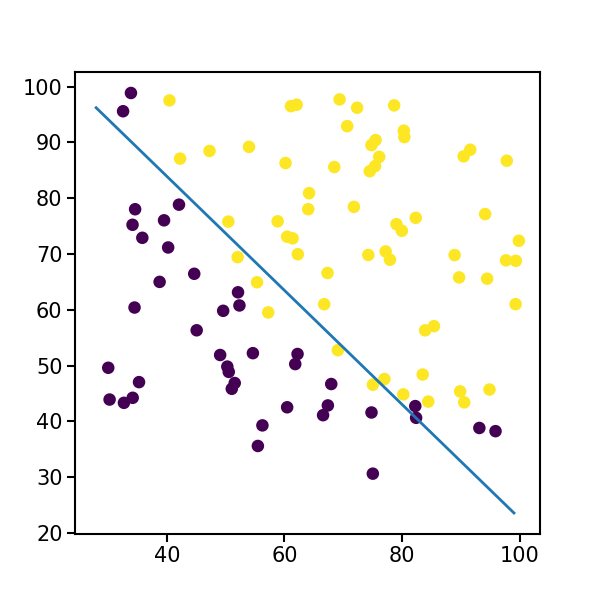

In [1442]:
fig = plt.figure()
ax = fig.add_subplot()
# ax.scatter( df1[:][0],df1[:][1], df1[:][2],lw=3,color='r')
ax.scatter( df1['grade1'],df1['grade2'], c=df1['pass'],lw=3)

X = np.arange(28,100,1)

# # a = np.array([theta[0,i] * x[i] for i in range(3)]  )
theta = res.x
ax.plot(X,(-theta[0] - theta[1]*X)/theta[2])

# Problem Non linear classification

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected.

In [1408]:
!head ex2data2.txt # training dataset

0.051267,0.69956,1
-0.092742,0.68494,1
-0.21371,0.69225,1
-0.375,0.50219,1
-0.51325,0.46564,1
-0.52477,0.2098,1
-0.39804,0.034357,1
-0.30588,-0.19225,1
0.016705,-0.40424,1
0.13191,-0.51389,1


In [1409]:
df2 = pd.read_csv('ex2data2.txt',header=None)
df2.columns = ['test1','test2','pass']

<IPython.core.display.Javascript object>


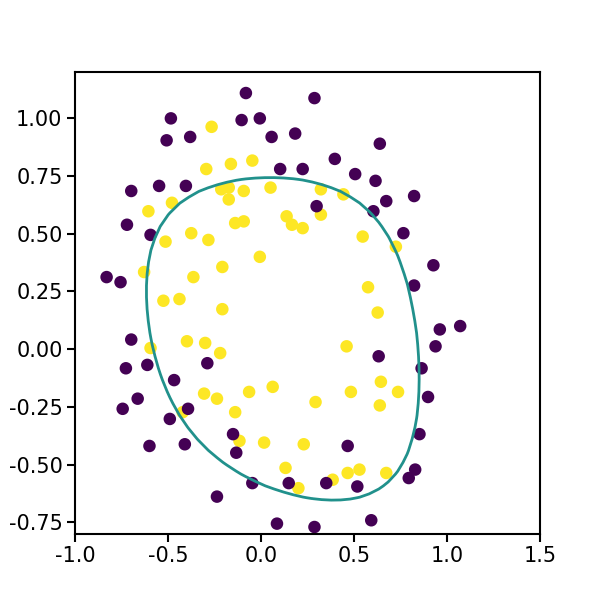

(-0.8, 1.2)

In [1410]:
fig = plt.figure()
ax = fig.add_subplot()
# ax.scatter( df1[:][0],df1[:][1], df1[:][2],lw=3,color='r')
ax.scatter( df2['test1'],df2['test2'], c=df2['pass'],lw=3)
ax.set_ylim(-0.8,1.2)



Constructing new feature vector to incorperate non linearity

In [1414]:
def map_feature(X1,X2,degree):
    X_data = []
    for i in range(1,degree+1):
        for j in range(i+1):
            X_data.append(X1**(i-j) * X2**j)
            
    return np.array(X_data).T


In [1415]:

degree = 6
X1 = df2['test1'].values
X2 = df2['test2'].values
X_data = map_feature(X1,X2,6)
        
X_data = np.insert(X_data, 0, np.ones(len(df2.loc[:,'test1'])),axis=1)
y = df2.loc[:,'pass'].values.reshape((len(df2),1))

m,n = X_data.shape
init_theta = np.ones(n)
lam = 1

In [1416]:
cost_func(init_theta,X_data,y,lam)

array([2.13484831])

In [1417]:
grad_func(init_theta,X_data,y,lam)

array([0.34604507, 0.08508073, 0.11852457, 0.1505916 , 0.01591449,
       0.16811439, 0.06712094, 0.03217053, 0.02604321, 0.10719727,
       0.09725885, 0.01098433, 0.04195657, 0.00957212, 0.12367776,
       0.05895534, 0.01870409, 0.01729323, 0.02352665, 0.01513039,
       0.09858123, 0.07328323, 0.01051447, 0.02270567, 0.00904832,
       0.02563548, 0.00823079, 0.10601204])

In [1418]:
# theta = np.array([-23,0.2,0.2])#.reshape((3,1))
res = minimize(cost_func,init_theta,args = (X_data,y,lam),jac = grad_func,
              options={'gtol': 1e-6, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 62
         Function evaluations: 64
         Gradient evaluations: 64


In [1419]:
res.x

array([ 1.27273338,  0.62531614,  1.1811217 , -2.01996468, -0.91740328,
       -1.43165483,  0.12394011, -0.36557654, -0.35732101, -0.17521638,
       -1.4581155 , -0.05099959, -0.61563529, -0.27474388, -1.19275981,
       -0.24221723, -0.20596389, -0.04472879, -0.27778358, -0.29540596,
       -0.4564128 , -1.04315665,  0.02781379, -0.29239002,  0.01562115,
       -0.32735878, -0.14391086, -0.92460365])

In [1420]:
# plotting non-linear desicion boundary
x1 = np.linspace(-1,1.5,50)
x2 = np.linspace(-1,1.5,50)
z = np.zeros((len(x1),len(x2)))
for i in range(len(x1)):
    for j in range(len(x2)):
        z[i,j] = res.x[0]+np.sum(map_feature(x1[i],x2[j],6)*res.x[1:])

In [1421]:
plt.contour(x1,x2,z,0)

# Reguralization

<font size="4">

https://www.simplilearn.com/tutorials/machine-learning-tutorial/regularization-in-machine-learning 

    
    
Link explaining the concept of regularization, bias (underfit) and variance (overfit)

# Implementing with sklearn

In [1474]:
logres = LogisticRegression(tol=1e-6)

In [1475]:
res = logres.fit(X[:,1:],y.flatten())

In [1476]:
res.coef_

array([[0.20535491, 0.2005838 ]])

In [1477]:
res.intercept_

array([-25.05219314])

Ohw my god! sklearn produces exactly the same results with just 2 lines of code! Amazing!

Let's plot the decision boundary to make sure 

In [1478]:
x1 = np.arange(30,100)
x2 = - (res.coef_[0,0] * x1 + res.intercept_)/res.coef_[0,1]

<IPython.core.display.Javascript object>


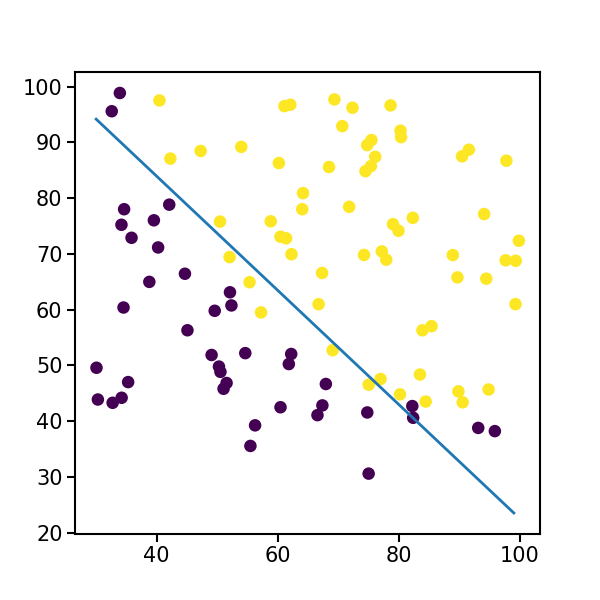

In [1479]:
fig = plt.figure()
ax = fig.add_subplot()
# ax.scatter( df1[:][0],df1[:][1], df1[:][2],lw=3,color='r')
ax.scatter( df1['grade1'],df1['grade2'], c=df1['pass'],lw=3)

ax.plot(x1,x2)

Produces the exact same decision boundary as our code above. Class 0 is area below boundary, while Class 1 is above boundary

In [1491]:
a = res.predict_proba(np.array([80,20]).reshape(1,2))
a

array([[0.99016695, 0.00983305]])

In [1492]:
np.sum(a)

1.0